In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from analytic import potentialsDC
from analytic import gradientsDC
from analytic import hessiansDC

In [4]:
from analytic import pseudoPotential

In [5]:
from scipy.constants import atomic_mass, elementary_charge, pi
mass = 40 * atomic_mass

In [6]:
# electrode_indices = np.arange(1, 21)
# electrode_indices = np.r_[1, np.arange(4, 9)]
electrode_indices = np.asarray([1, 8, 9, 10, 11, 18, 19, 20])

electrodes = [f"E{j}" for j in electrode_indices]


electrodes

from matplotlib.patches import Rectangle

d = 125e-6
electrode_centers = (electrode_indices - 6) * d

def plot_electrodes(ax, y=-5, h=0.2):
    L = 120e-6

#     for n in range(1, 11):
    for n in range(8, 11):
        c = (n - 6) * d
        r = Rectangle(((c - L/2)*1e6, y-h/2), L*1e6, h, color='gold')
        ax.text(c*1e6, y, n)
        ax.add_patch(r)

In [7]:
def electrode_potential(x, V, index):
    return V * getattr(potentialsDC, f"E{index}")(x, 0, z0)

def tot_potential(x, V):
    tot = [electrode_potential(x, v, ix) for v, ix in zip(V, electrode_indices)]
    return sum(tot)


def tr_electrode_potential(y, z, V, index):
    return V * getattr(potentialsDC, f"E{index}")(x0, y, z)

def tr_tot_potential(y, z, V):
    tot = [tr_electrode_potential(y, z, v, ix) for v, ix in zip(V, electrode_indices)]
    return sum(tot)


def target_potential(x, freq, p, offset, x0=0, clip=True):
    pot = 0.5 * freq**2 * a0 * (x - x0)**2 - freq**2 * p * b0 * (x - x0) + offset + freq**2 * p**2 * c0
    if clip:
        pot[np.where(pot - pot.min() > 0.1)] = np.nan
    return pot


In [8]:
from calculate_voltage import calculate_voltage

In [9]:
# x = np.arange(-2000, 2001) * 1e-6

x0 = 375e-6
z0 = 51.5e-6

x = np.arange(-300, 300) * 1e-6 + x0


L = 20
y = np.linspace(-L, L) * 1e-6
z = y + z0

Y, Z = np.meshgrid(y, z)

omega = 2*np.pi * 34e6

Vps = pseudoPotential.ps0(x0, Y, Z, 40, omega)

In [10]:
from scipy.constants import Boltzmann as kB

In [18]:
kB * 500 / elementary_charge * 1e3

43.08665168608606

<IPython.core.display.Javascript object>


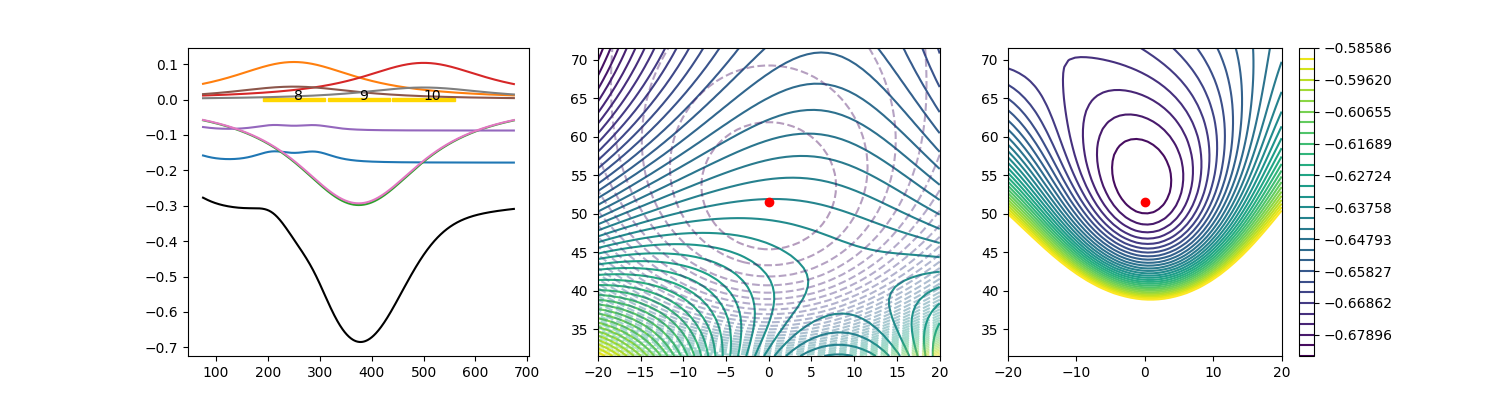

In [17]:
# vx = calculate_voltage(1, -3.4, -1.3, -0.3, 5)[electrode_indices - 1]
vx = calculate_voltage(2, -3.4, -1.3, -0.3, 5)[electrode_indices - 1]


fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 4))

for j, v in enumerate(vx):
    ix = electrode_indices[j]
    ax.plot(x*1e6, electrode_potential(x, v, ix), label=ix)
    
ax.plot(x*1e6, tot_potential(x, vx), 'k', label='tot')
plot_electrodes(ax, y=0, h=0.01)

Vtr = tr_tot_potential(Y, Z, vx)
Vtot = Vtr + Vps

levels = np.linspace(Vtot.min(), Vtot.min() + 0.1, 30)

ax1.contour(Y*1e6, Z*1e6, Vtr, 50)
ax1.contour(Y*1e6, Z*1e6, Vps, 50, linestyles='--', alpha=0.4)
ax1.plot(0, z0*1e6, 'or')

c = ax2.contour(Y*1e6, Z*1e6, Vtot, levels)
ax2.plot(0, z0*1e6, 'or')
plt.colorbar(c, ax=ax2)